<a href="https://colab.research.google.com/github/shatakshii25/Machine-Learning-Projects/blob/main/Comparision_of_MLP_with_one_%26_more_layers_and_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing data processing libraries to import data**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

**Reading the dataset and retrieving it's details**

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_train.shape)
print("y_test shape:", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (60000, 28, 28)
y_test shape: (10000,)


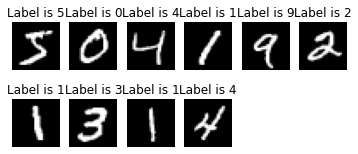

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def viewImage(img_data, label_data, start=0, count=1):
    for i in range(count):
        # The first column is the label

        label = label_data[start+i]

        # The rest of columns are pixels

        pixels = img_data[start+i]

        # Plot

#         plt.figure(figsize=(10,10))
        plt.subplot(count//5+1, 6, (i+1))
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.axis("off")


viewImage(x_train, y_train, 0, 10)

**Creating Model for the MNIST Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10)
])

model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics = [SparseCategoricalAccuracy()]
)

clf = model.fit(
    x_train, y_train,
    epochs=6,
    validation_data = (x_test, y_test),
)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7717 - sparse_categorical_accuracy: 0.8604 - val_loss: 0.5232 - val_sparse_categorical_accuracy: 0.8820
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3688 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.3572 - val_sparse_categorical_accuracy: 0.9193
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.3108 - val_sparse_categorical_accuracy: 0.9308
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2526 - sparse_categorical_accuracy: 0.9366 - val_loss: 0.2756 - val_sparse_categorical_accuracy: 0.9351
Epoch 5/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0.9409 - val_loss: 0.2852 - val_sparse_categorical_accuracy: 0.9431
Epoch 6/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2209 - sparse_cate

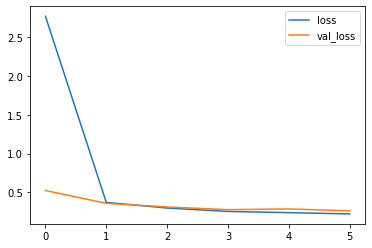

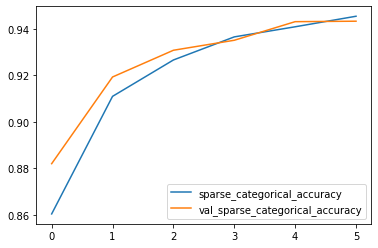

In [ ]:
import pandas as pd

clf = pd.DataFrame(clf.history)

clf.loc[:, ['loss', 'val_loss']].plot()
clf.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot();

**Performing Data Augmentation on the dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# rotation = Sequential([
#     layers.Flatten(),
#     RandomRotation(0.2),
# ])

# def augmentData(img_data, label_data, start=0, count=1):
#     new_data = [[],[]]
#     for i in range(count):
#         # The first column is the label

#         label = label_data[start+i]

#         # The rest of columns are pixels
#         pixels = img_data[start+i]
        
#         image = tf.cast(tf.expand_dims(pixels, 0), tf.float32)[0]
# #         print(image)
#         augmented_img = rotation(image)
        
        
#         plt.subplot(count//5+1, 6, (i+1))
#         plt.title('Label is {label}'.format(label=label))
#         plt.imshow(image, cmap='gray')
#         plt.axis("off")
#         new_data[0].append(image)
#         new_data[1].append(label_data[start+i])

#     return new_data

# data = augmentData(x_train, y_train, 0, 4)

augmentation_model = Sequential([
    preprocessing.RandomContrast(0.2),

    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10),
])

augmentation_model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics = [SparseCategoricalAccuracy()]
)

history = augmentation_model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.5986 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.5832 - val_sparse_categorical_accuracy: 0.8741
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4081 - sparse_categorical_accuracy: 0.9054 - val_loss: 0.3850 - val_sparse_categorical_accuracy: 0.9142
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.3026 - val_sparse_categorical_accuracy: 0.9289
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2528 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.2788 - val_sparse_categorical_accuracy: 0.9361
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2349 - sparse_categorical_accuracy: 0.9392 - val_loss: 0.2467 - val_sparse_categorical_accuracy: 0.9391
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2237 - sparse_cate

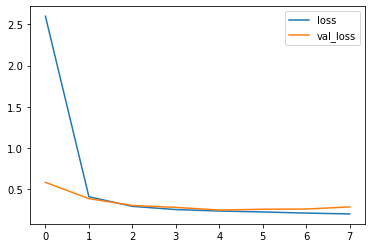

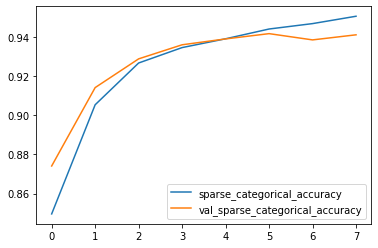

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot();